<a href="https://colab.research.google.com/github/Israel-Garcilazo/EDP1/blob/main/OndaBidimensional.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Solución de la Ecuación de Onda Bidimensional para una Membrana Rectangular


## 1. Planteamiento del Problema
La ecuación de onda bidimensional que modela la vibración de una membrana rectangular es:

$$\frac{\partial^2 u}{\partial t^2} = c^2 \left( \frac{\partial^2 u}{\partial x^2} + \frac{\partial^2 u}{\partial y^2} \right)$$

**Condiciones:**
- **Frontera**: $u = 0$ en los bordes para $t \geq 0$
- **Iniciales**:
  - $u(x,y,0) = f(x,y) = 0.1(4x-x^2)(2y-y^2)$ ft
  - $\frac{\partial u}{\partial t}\big|_{t=0} = g(x,y) = 0$

  ## 2. Solución Analítica
Usamos **separación de variables**: $u(x,y,t) = X(x)Y(y)T(t)$

In [1]:
# Importación de librerías
import numpy as np
from scipy.integrate import dblquad
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

## 3. Implementación Numérica
Definimos parámetros y función inicial:

In [2]:
# Parámetros físicos
a, b = 2, 2  # Dimensiones de la membrana en pies
c = 1.0      # Velocidad de propagación
N = 5        # Número de términos en la serie de Fourier
t = 0.5      # Tiempo para la visualización (en segundos)

# Función de desplazamiento inicial
def f(x, y):
    return 0.1 * (4*x - x**2) * (2*y - y**2)

### 3.1 Cálculo de Coeficientes $A_{nm}$

In [3]:
# Cálculo de los coeficientes A_nm
A = np.zeros((N, N))
for n in range(1, N+1):
    for m in range(1, N+1):
        integrand = lambda x, y: f(x, y) * np.sin(n*np.pi*x/a) * np.sin(m*np.pi*y/b)
        A[n-1, m-1], _ = dblquad(integrand, 0, a, 0, b)
A *= 4/(a*b)  # Factor de normalización

print("Coeficientes calculados:")
print(A)

Coeficientes calculados:
[[ 3.69321681e-01  3.34176618e-17  1.36785808e-02 -1.16522218e-17
   2.95457344e-03]
 [-1.31404573e-01 -1.33470497e-17 -4.86683603e-03  5.15416326e-18
  -1.05123658e-03]
 [ 9.15479573e-02  9.52519394e-18  3.39066508e-03 -6.60953075e-18
   7.32383658e-04]
 [-6.57022864e-02 -6.72233273e-18 -2.43341802e-03  4.29264840e-18
  -5.25618291e-04]
 [ 5.34139294e-02  2.26041840e-18  1.97829368e-03 -1.17659980e-18
   4.27311435e-04]]


### 3.2 Función de Solución $u(x,y,t)$

In [4]:
# Función de solución u(x,y,t)
def u(x, y, t, N_terms=N):
    total = 0.0
    for n in range(1, N_terms+1):
        for m in range(1, N_terms+1):
            λ = np.sqrt((n*np.pi/a)**2 + (m*np.pi/b)**2)
            total += A[n-1, m-1] * np.sin(n*np.pi*x/a) * np.sin(m*np.pi*y/b) * np.cos(c*λ*t)
    return total

## 4. Visualización 3D

In [5]:
# Creación de la malla para la visualización
x = np.linspace(0, a, 50)
y = np.linspace(0, b, 50)
X, Y = np.meshgrid(x, y)

# Calculamos Z = u(X,Y,t)
Z = np.zeros_like(X)
for i in range(len(x)):
    for j in range(len(y)):
        Z[j,i] = u(x[i], y[j], t)

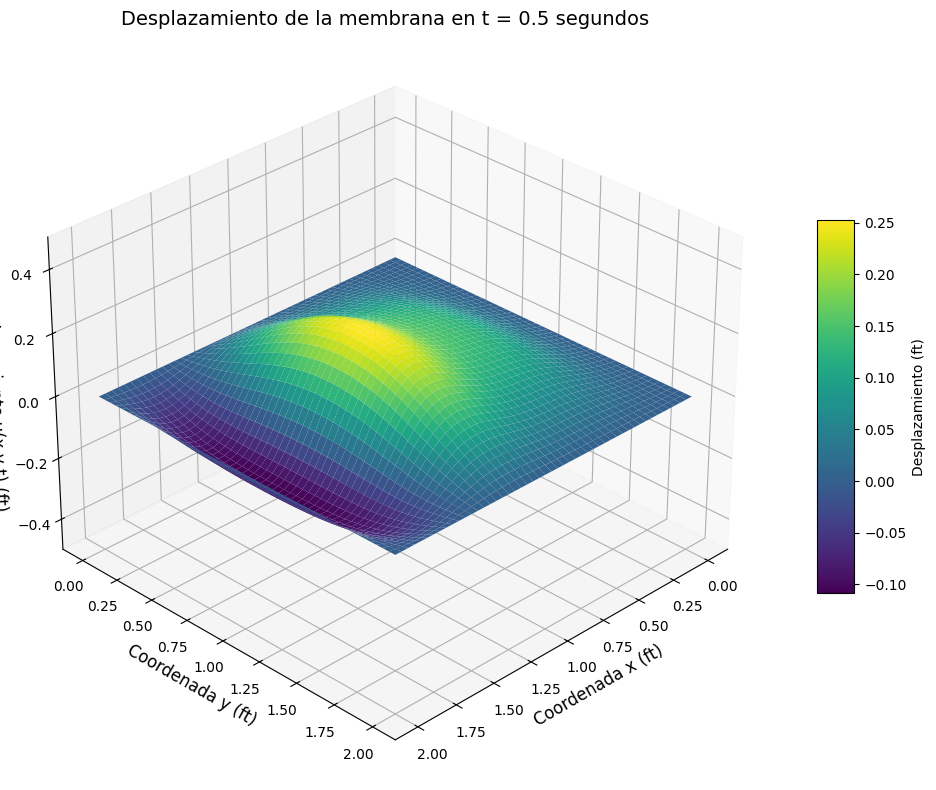

In [6]:
# Visualización 3D estática
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Graficar superficie
surf = ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none')

# Configuración de ejes y título
ax.set_title(f'Desplazamiento de la membrana en t = {t} segundos', fontsize=14)
ax.set_xlabel('Coordenada x (ft)', fontsize=12)
ax.set_ylabel('Coordenada y (ft)', fontsize=12)
ax.set_zlabel('Desplazamiento u(x,y,t) (ft)', fontsize=12)
ax.set_zlim(-0.5, 0.5)

# Barra de colores
fig.colorbar(surf, shrink=0.5, aspect=10, label='Desplazamiento (ft)')

# Ajustar vista
ax.view_init(elev=30, azim=45)

plt.tight_layout()
plt.show()